In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("../data/schemas/warm_up/TrainSet.csv", sep=",")
test = pd.read_csv("../data/schemas/warm_up/TestSet.csv", sep=",")

In [4]:
NUM_OF_TIMESTEPS_INPUT = 48
NUM_OF_TIMESTEPS_OUTPUT = 24

In [8]:
threshold = 0.4
column_to_predict = "kg_CO2/kWh"

independent_variables = []


for column in train:
    if abs(train[column].corr(train[column_to_predict])) > threshold:
        independent_variables.append(column)

# independent_variables.remove(column_to_predict)
if "Index" in independent_variables:
    independent_variables.remove("Index")
independent_variables

['Hour_1',
 'Hour_2',
 'Hour_3',
 'Occupant Count (people)_3',
 '12h Outdoor Drybulb Temperature (C)',
 '24h Outdoor Drybulb Temperature (C)',
 '12h Outdoor Relative Humidity (%)',
 '6h Direct Solar Radiation (W/m2)',
 '12h Direct Solar Radiation (W/m2)',
 'kg_CO2/kWh']

In [10]:
X_train = train[independent_variables]
# X_train = train[["Hour_1", "Day Type_1"]]
Y_train = train[column_to_predict]

print(X_train.shape)
X_train.head()

(648, 10)


,Hour_1,Hour_2,Hour_3,Occupant Count (people)_3,12h Outdoor Drybulb Temperature (C),24h Outdoor Drybulb Temperature (C),12h Outdoor Relative Humidity (%),6h Direct Solar Radiation (W/m2),12h Direct Solar Radiation (W/m2),kg_CO2/kWh
0,0.000000,0.000000,0.000000,1.0,0.840306,0.341111,0.284653,0.135681,0.903531,0.297295
1,0.043478,0.043478,0.043478,1.0,0.835694,0.131464,0.236548,0.284343,0.730342,0.206405
2,0.086957,0.086957,0.086957,1.0,0.875368,0.138832,0.141625,0.186202,0.874457,0.146161
3,0.130435,0.130435,0.130435,1.0,0.960541,0.293742,0.157973,0.440659,0.756219,0.134990
4,0.173913,0.173913,0.173913,0.5,0.902451,0.180205,0.177644,0.538847,0.833150,0.167124


In [11]:
def create_sequences(input_data, output_data, timesteps_input, timesteps_output):
    sequences, targets = [], []
    for i in range(len(input_data) - timesteps_input - timesteps_output + 1):
        seq = input_data[i:i + timesteps_input]
        #print(f"i = {i}, seq = {seq}")
        target = output_data[i + timesteps_input: i + timesteps_input + timesteps_output]
        #print(f"i = {i}, target = {target}")
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)

In [12]:
input_sequences, target_variables = create_sequences(X_train, Y_train, NUM_OF_TIMESTEPS_INPUT, NUM_OF_TIMESTEPS_OUTPUT)
print(input_sequences[0])
print(target_variables[0])
print(input_sequences.shape)
print(target_variables.shape)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  8.40305674e-01 3.41110874e-01 2.84653240e-01 1.35680787e-01
  9.03531290e-01 2.97294973e-01]
 [4.34782609e-02 4.34782609e-02 4.34782609e-02 1.00000000e+00
  8.35694132e-01 1.31464429e-01 2.36547501e-01 2.84342677e-01
  7.30342170e-01 2.06405263e-01]
 [8.69565217e-02 8.69565217e-02 8.69565217e-02 1.00000000e+00
  8.75367853e-01 1.38832035e-01 1.41625263e-01 1.86201506e-01
  8.74456687e-01 1.46160546e-01]
 [1.30434783e-01 1.30434783e-01 1.30434783e-01 1.00000000e+00
  9.60540996e-01 2.93742444e-01 1.57973161e-01 4.40658779e-01
  7.56219376e-01 1.34989510e-01]
 [1.73913043e-01 1.73913043e-01 1.73913043e-01 5.00000000e-01
  9.02450503e-01 1.80204520e-01 1.77644208e-01 5.38847476e-01
  8.33149859e-01 1.67124490e-01]
 [2.17391304e-01 2.17391304e-01 2.17391304e-01 5.00000000e-01
  8.54914265e-01 2.18826081e-01 1.59108714e-01 8.63126113e-01
  4.14593785e-01 2.18208263e-01]
 [2.60869565e-01 2.60869565e-01 2.60869565e-01 5.00000000e

In [13]:
# importing libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.optimizers import SGD

2023-12-19 09:15:58.616517: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 09:15:58.907094: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-19 09:15:58.907138: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-19 09:15:58.921402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-19 09:15:58.949110: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-19 09:15:58.949557: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [15]:
# initializing the LSTM
model_LSTM = keras.Sequential([        
        keras.layers.LSTM(48, activation='tanh', input_shape=(input_sequences.shape[1], input_sequences.shape[2]), return_sequences=True),
        # keras.layers.Dropout(0.2),   no dropout yet
        keras.layers.LSTM(48, activation='tanh', return_sequences=True),
        keras.layers.LSTM(24, activation='tanh', return_sequences=False),
        keras.layers.Dense(24)
    ]) #amount of layers & neurons to be adjusted


# compiling RNN
model_LSTM.compile(optimizer = SGD(learning_rate=0.01, 
                                  momentum=0.9, 
                                  nesterov=True), 
                  loss = "mean_squared_error")
 
model_LSTM.summary()

2023-12-19 09:18:22.135242: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 48, 48)            11328     
                                                                 
 lstm_1 (LSTM)               (None, 48, 48)            18624     
                                                                 
 lstm_2 (LSTM)               (None, 24)                7008      
                                                                 
 dense (Dense)               (None, 24)                600       
                                                                 
Total params: 37560 (146.72 KB)
Trainable params: 37560 (146.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# fitting the model
history_LSTM = model_LSTM.fit(input_sequences, target_variables, epochs = 100, verbose=1)

Epoch 1/100
19/19 [==============================] - 3s 20ms/step - loss: 0.2697
Epoch 2/100
19/19 [==============================] - 0s 18ms/step - loss: 0.1269
Epoch 3/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0723
Epoch 4/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0559
Epoch 5/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0519
Epoch 6/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0510
Epoch 7/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0508
Epoch 8/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0505
Epoch 9/100
19/19 [==============================] - 0s 18ms/step - loss: 0.0502
Epoch 10/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0499
Epoch 11/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0496
Epoch 12/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0492
Epoch 13/100
19/19 [=====

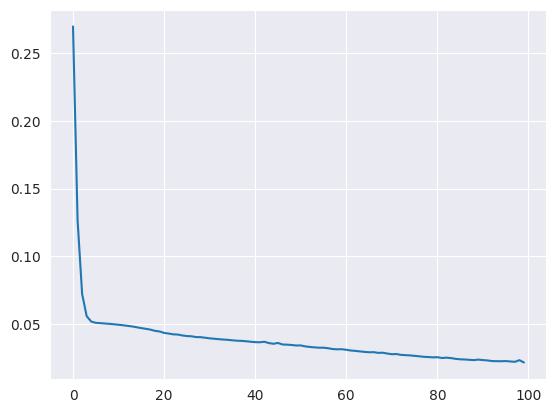

In [17]:
loss_per_epoch = model_LSTM.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
# Evaluate the model on the test data
predictions = []
#print(len(eval_target_variables))

for i in range(len(eval_target_variables)):
    current_batch = eval_input_sequences[i].reshape((1, NUM_OF_TIMESTEPS_INPUT, 50))
    curr_pred = model.predict(current_batch)
    predictions.append(curr_pred)

#print(predictions)